Progetto laboratorio di programmazione. Gruppo: Nicolò Cioni, Rossano Gilioli e Salvatore Russo. Dataset scelto : dataset n 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, tree
from sklearn.metrics import *
pd.set_option("display.max_rows", 70)
test= pd.read_csv("/content/sample_data/1.test_convertito_numerici.csv", sep=",")
test_non = pd.read_csv("/content/sample_data/1.test_non_convertito.csv", sep=",")
train_non = pd.read_csv("/content/sample_data/1.train_non_convertito.csv", sep=",")
train = pd.read_csv("/content/sample_data/1.train_convertito_numerici.csv", sep=",")

Quante righe e colonne sono presenti nei due dataset? I valori sono per lo più numerici o categorici e tra le righe sono poi presenti valori nulli?

In [2]:
train.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,56707.000000,56707.000000,56707.000000,56707.0,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,...,56707.000000,56707.00000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000
mean,0.327420,0.358633,102.870369,2016.0,6.767313,28.458162,15.911104,0.893981,2.442802,1.850988,...,1.349075,0.22484,0.124429,71.445095,8.487435,3.833865,2.171302,98.325863,0.068334,0.548645
std,0.469276,0.479603,106.582358,0.0,3.194300,13.925493,8.784897,0.983110,1.863548,0.498133,...,1.887103,0.66649,0.337000,102.585427,47.550647,23.785668,0.477327,49.955696,0.253296,0.761173
min,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,17.000000,2016.0,4.000000,17.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.00000,0.000000,7.000000,-1.000000,0.000000,2.000000,68.530000,0.000000,0.000000
50%,0.000000,0.000000,68.000000,2016.0,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.00000,0.000000,9.000000,-1.000000,0.000000,2.000000,90.950000,0.000000,0.000000
75%,1.000000,1.000000,160.000000,2016.0,10.000000,41.000000,24.000000,2.000000,3.000000,2.000000,...,3.000000,0.00000,0.000000,134.000000,-1.000000,0.000000,2.000000,120.000000,0.000000,1.000000
max,1.000000,1.000000,709.000000,2016.0,12.000000,53.000000,31.000000,19.000000,50.000000,4.000000,...,11.000000,21.00000,2.000000,481.000000,499.000000,391.000000,3.000000,5400.000000,3.000000,5.000000


In [3]:
test.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,40687.000000,40687.000000,40687.000000,40687.0,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,...,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000
mean,0.323912,0.386979,109.259223,2017.0,4.709784,18.630373,15.717576,0.973308,2.601543,1.877995,...,1.386168,0.239438,0.102736,83.233047,12.665544,0.235186,2.109961,114.637950,0.054981,0.676506
std,0.467973,0.487065,107.940953,0.0,2.160014,9.422475,8.789609,1.014337,1.973291,0.496172,...,1.907991,0.683429,0.305795,116.963712,65.972486,4.458834,0.454108,52.256304,0.235894,0.846531
min,0.000000,0.000000,0.000000,2017.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,0.000000,23.000000,2017.0,3.000000,11.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,2.000000,80.000000,0.000000,0.000000
50%,0.000000,0.000000,80.000000,2017.0,5.000000,19.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,2.000000,107.100000,0.000000,0.000000
75%,1.000000,1.000000,164.500000,2017.0,7.000000,26.000000,23.000000,2.000000,3.000000,2.000000,...,3.000000,0.000000,0.000000,229.000000,-1.000000,0.000000,2.000000,140.000000,0.000000,1.000000
max,1.000000,1.000000,629.000000,2017.0,8.000000,35.000000,31.000000,16.000000,40.000000,4.000000,...,11.000000,18.000000,2.000000,535.000000,543.000000,223.000000,3.000000,510.000000,8.000000,5.000000


In [4]:
tot_train =  56707

In [5]:
tot_test= 40687

Nel "Train dataset" sono presenti 56707 righe mentre nel "Test Dataset" 40687. Le colonne sono 30 per entrambi. I valori sono perlopiù categorici (18/30), infatti,  molti dei valori segnati come "int" in realtà sono la conversione in numero di "Si" e "No"(es: "is_canceled") . In entrambi i dateset non sono presenti valori nulli. La media delle cancellazioni è del 36% nel train dataset e del 39% nel secondo.

Come si distribuisce il valore relativo al numero di persone? Quante prenotazioni includono bambini e quanti ospiti sono, invece,  da soli?

In [59]:
train["persone"] = train["babies"] + train["children"] + train["adults"]
print(train["persone"].mean())
test["persone"] = test["babies"] + test["children"] + test["adults"]
print(test["persone"].mean())

1.9633378595235156
2.0107405313736573


In [7]:
train.groupby(train["babies"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone
babies,,,,,,,,,,,,,,,,,,,,,
0,56261,56261,56261,56261,56261,56261,56261,56261,56261,56261,...,56261,56261,56261,56261,56261,56261,56261,56261,56261,56261
1,437,437,437,437,437,437,437,437,437,437,...,437,437,437,437,437,437,437,437,437,437
2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
#unisco colonne children e babies
train["colonna_bambini"] = train["babies"] + train["children"]
train.groupby(train["colonna_bambini"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone
colonna_bambini,,,,,,,,,,,,,,,,,,,,,
0.0,52211,52211,52211,52211,52211,52211,52211,52211,52211,52211,...,52211,52211,52211,52211,52211,52211,52211,52211,52211,52211
1.0,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,...,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678
2.0,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,...,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768
3.0,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
10.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
test["colonna_bambini"] = test["babies"] + test["children"]
test.groupby(test["colonna_bambini"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone
colonna_bambini,,,,,,,,,,,,,,,,,,,,,
0.0,36941,36941,36941,36941,36941,36941,36941,36941,36941,36941,...,36941,36941,36941,36941,36941,36941,36941,36941,36941,36941
1.0,2136,2136,2136,2136,2136,2136,2136,2136,2136,2136,...,2136,2136,2136,2136,2136,2136,2136,2136,2136,2136
2.0,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,...,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565
3.0,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45


In [10]:
#media cancellazioni in base al numero di bambini
train.groupby(train["colonna_bambini"])["is_canceled"].mean()

colonna_bambini
0.0     0.360020
1.0     0.305078
2.0     0.400452
3.0     0.306122
10.0    0.000000
Name: is_canceled, dtype: float64

In [11]:
test.groupby(test["colonna_bambini"])["is_canceled"].mean()

colonna_bambini
0.0    0.385859
1.0    0.352060
2.0    0.466454
3.0    0.200000
Name: is_canceled, dtype: float64

In [12]:
train[train["colonna_bambini"] > 9.00]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
18765,0,0,37,2016,1,3,12,0,2,2,...,0,9.0,-1.0,0,2,84.45,0,1,12.0,10.0


In [13]:
train.groupby(train["persone"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,colonna_bambini
persone,,,,,,,,,,,,,,,,,,,,,
0.0,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
1.0,10967,10967,10967,10967,10967,10967,10967,10967,10967,10967,...,10967,10967,10967,10967,10967,10967,10967,10967,10967,10967
2.0,38563,38563,38563,38563,38563,38563,38563,38563,38563,38563,...,38563,38563,38563,38563,38563,38563,38563,38563,38563,38563
3.0,5189,5189,5189,5189,5189,5189,5189,5189,5189,5189,...,5189,5189,5189,5189,5189,5189,5189,5189,5189,5189
4.0,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852,...,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852
5.0,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
12.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [14]:
test.groupby(test["persone"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,colonna_bambini
persone,,,,,,,,,,,,,,,,,,,,,
0.0,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
1.0,7181,7181,7181,7181,7181,7181,7181,7181,7181,7181,...,7181,7181,7181,7181,7181,7181,7181,7181,7181,7181
2.0,27455,27455,27455,27455,27455,27455,27455,27455,27455,27455,...,27455,27455,27455,27455,27455,27455,27455,27455,27455,27455
3.0,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,...,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282
4.0,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,...,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636
5.0,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66


In [15]:
train.groupby(train["persone"])["is_canceled"].mean()

persone
0.0     0.154762
1.0     0.301176
2.0     0.380468
3.0     0.305454
4.0     0.405508
5.0     0.254902
12.0    0.000000
Name: is_canceled, dtype: float64

In [16]:
test.groupby(test["persone"])["is_canceled"].mean()

persone
0.0    0.164179
1.0    0.290071
2.0    0.409033
3.0    0.380897
4.0    0.473105
5.0    0.242424
Name: is_canceled, dtype: float64

La media del numero di persone è di circa 2 persone in entrambi i dataset.
Il numero di prenotazioni composte da un numero qualsiasi di adulti con almeno un bambino ("babies" e/o "children") è relativamente basso in entrambi i dataset: poco meno di 4500 per il train e 3700 per il test . Il numero massimo di bambini è di 10 raggiunto però in un singolo caso. Escludendo quello il massimo di bambini a seguito è di 3. La media delle cancellazioni scende per le prenotazioni con solamente un bambini e torna a salire per le prenotazioni con 2 bambini a seguito (le prenotazioni con 3 bambini sono così poche da non essere rilevanti). Escludendo suddetto caso estremo il numero massimo di persone per una singola camera è 5, l'aumentare del numero di persone non aumenta la media delle cancellazioni in modo lineare (prenotazioni da 3 componenti cancellano in media meno che prenotazioni da 2 e da 4). In entrambi i dataset poi sono presenti valori anomali corrispondenti a 0 persone per camera (84 nel train e 67 nel test).
Il numero di viaggiatori "solitari" è invece cospicuo e simile in entrambi i dataset.
Il numero di adulti per prenotazione varia da un minomo di 1 fino a un massimo di 4.



Come si distrubuisce il numero delle prenotazioni nei mesi dell'anno e la media delle cancellazioni?

In [17]:
train.groupby(train["arrival_date_month"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
1,2248,2248,2248,2248,2248,2248,2248,2248,2248,2248,...,2248,2248,2248,2248,2248,2248,2248,2248,2248,2248
2,3891,3891,3891,3891,3891,3891,3891,3891,3891,3891,...,3891,3891,3891,3891,3891,3891,3891,3891,3891,3891
3,4824,4824,4824,4824,4824,4824,4824,4824,4824,4824,...,4824,4824,4824,4824,4824,4824,4824,4824,4824,4824
4,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428,...,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428
5,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,...,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478
6,5292,5292,5292,5292,5292,5292,5292,5292,5292,5292,...,5292,5292,5292,5292,5292,5292,5292,5292,5292,5292
7,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,...,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572
8,5063,5063,5063,5063,5063,5063,5063,5063,5063,5063,...,5063,5063,5063,5063,5063,5063,5063,5063,5063,5063
9,5394,5394,5394,5394,5394,5394,5394,5394,5394,5394,...,5394,5394,5394,5394,5394,5394,5394,5394,5394,5394


In [18]:
test.groupby(test["arrival_date_month"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
1,3681,3681,3681,3681,3681,3681,3681,3681,3681,3681,...,3681,3681,3681,3681,3681,3681,3681,3681,3681,3681
2,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,...,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177
3,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,...,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970
4,5661,5661,5661,5661,5661,5661,5661,5661,5661,5661,...,5661,5661,5661,5661,5661,5661,5661,5661,5661,5661
5,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,...,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313
6,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,...,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647
7,5313,5313,5313,5313,5313,5313,5313,5313,5313,5313,...,5313,5313,5313,5313,5313,5313,5313,5313,5313,5313
8,4925,4925,4925,4925,4925,4925,4925,4925,4925,4925,...,4925,4925,4925,4925,4925,4925,4925,4925,4925,4925


In [19]:
train.groupby(train["arrival_date_month"])["persone"].mean()

arrival_date_month
1     1.705961
2     1.854279
3     1.919776
4     1.929071
5     1.902154
6     1.908730
7     2.209318
8     2.291132
9     1.972562
10    1.928099
11    1.797261
12    2.001554
Name: persone, dtype: float64

In [20]:
test.groupby(test["arrival_date_month"])["persone"].mean()

arrival_date_month
1    1.817169
2    1.935360
3    1.845272
4    2.036566
5    1.906542
6    2.015229
7    2.219273
8    2.260102
Name: persone, dtype: float64

In [21]:
#media cancellazioni in base al mese di arrivo
train.groupby(train["arrival_date_month"])["is_canceled"].mean()

arrival_date_month
1     0.247776
2     0.343613
3     0.306177
4     0.379698
5     0.349580
6     0.396070
7     0.327865
8     0.360458
9     0.374861
10    0.405288
11    0.367310
12    0.362176
Name: is_canceled, dtype: float64

In [22]:
test.groupby(test["arrival_date_month"])["is_canceled"].mean()

arrival_date_month
1    0.339582
2    0.325353
3    0.336419
4    0.435082
5    0.437510
6    0.431911
7    0.373424
8    0.368731
Name: is_canceled, dtype: float64

I due dataset differiscono per il numero di mesi tenuti in considerazione: il testdataset, infatti, prende in considerazione soltanto i mesi da gennaio a agosto.
Il mese che ha riscontrato più prenotazioni nel traindataset è quello di ottobre, tuttavia le prenotazioni sembrano abbastanza equamente suddivise, fatta eccezione per gennaio dove si è riscontrato un valore notevolmente più basso in entrambi i dataset (anche se più marcato nel train). Nel test dataset si ha poi un aumento non trascurabile di prenotazioni nel meese di maggio, non presente invece nel train.
La media realtiva al numero di persone in ognuno dei mesi dell'anno è in linea con quella generale dei due dataset.
Quella delle cancellazioni invece risulta più altalentante con valori che si distanziano notevolmente dalla media generale (es: gennaio, nel train dataset, si distanzia di 11 punti percentuali).

Come si sono divisi i casi in base al segmento di mercaro? Come cambia la media relativa al numero di cancellazioni?

In [23]:
train_non.groupby(train_non["market_segment"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
market_segment,,,,,,,,,,,,,,,,,,,,,
Aviation,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
Complementary,364,364,364,364,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
Corporate,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,...,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562
Direct,5663,5663,5663,5663,5663,5663,5663,5663,5663,5663,...,5663,5663,5663,5663,5663,5663,5663,5663,5663,5663
Groups,7857,7857,7857,7857,7857,7857,7857,7857,7857,7857,...,7857,7857,7857,7857,7857,7857,7857,7857,7857,7857
Offline TA/TO,12473,12473,12473,12473,12473,12473,12473,12473,12473,12473,...,12473,12473,12473,12473,12473,12473,12473,12473,12473,12473
Online TA,27661,27661,27661,27661,27661,27661,27661,27661,27661,27661,...,27661,27661,27661,27661,27661,27661,27661,27661,27661,27661


In [24]:
test_non.groupby(test_non["market_segment"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
market_segment,,,,,,,,,,,,,,,,,,,,,
Aviation,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
Complementary,214,214,214,214,214,214,214,214,214,214,...,214,214,214,214,214,214,214,214,214,214
Corporate,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,...,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562
Direct,4629,4629,4629,4629,4629,4629,4629,4629,4629,4629,...,4629,4629,4629,4629,4629,4629,4629,4629,4629,4629
Groups,5854,5854,5854,5854,5854,5854,5854,5854,5854,5854,...,5854,5854,5854,5854,5854,5854,5854,5854,5854,5854
Offline TA/TO,5667,5667,5667,5667,5667,5667,5667,5667,5667,5667,...,5667,5667,5667,5667,5667,5667,5667,5667,5667,5667
Online TA,22651,22651,22651,22651,22651,22651,22651,22651,22651,22651,...,22651,22651,22651,22651,22651,22651,22651,22651,22651,22651


In [25]:
test_non.groupby(test_non["market_segment"])["is_canceled"].mean()

market_segment
Aviation         0.209091
Complementary    0.163551
Corporate        0.254802
Direct           0.154677
Groups           0.581141
Offline TA/TO    0.337745
Online TA        0.408680
Name: is_canceled, dtype: float64

In [26]:
train_non.groupby(train_non["market_segment"])["is_canceled"].mean()

market_segment
Aviation         0.228346
Complementary    0.129121
Corporate        0.146370
Direct           0.153099
Groups           0.617539
Offline TA/TO    0.347150
Online TA        0.355627
Name: is_canceled, dtype: float64

I valori relativi ai canali di distribuzione scelti dai visitatori sembrano più o meno simili nei due dataset fatta eccezione per il dato inerente alle prenotazioni avvenute offline tramite TA/TO (decisamente più alto nel traindataset).
"Aviation" e "complementary" hanno un numero di casi estremamente più basso mentre le prenotazioni presso agenzie online rappresentano circa la metà dei casi in entrambi i datset.
La media delle cancellazioni è quasi raddoppiata per quanto riguarda i gruppi mentre è dimezzata per chi prenota direttamente.

Come si distribuisce il valore delle prenotazioni precedenti (cancellate e non) e come aver già prenotato presso l'hotel cambia la media delle cancellazioni? C'è differenza tra avere già avuto una prenotazione non cancellata e una cancellazione?

In [27]:
train.groupby(train["previous_cancellations"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,54936,54936,54936,54936,54936,54936,54936,54936,54936,54936,...,54936,54936,54936,54936,54936,54936,54936,54936,54936,54936
1,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,...,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595
2,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
3,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
4,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
5,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
6,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
11,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
13,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [28]:
test.groupby(test["previous_cancellations"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,40409,40409,40409,40409,40409,40409,40409,40409,40409,40409,...,40409,40409,40409,40409,40409,40409,40409,40409,40409,40409
1,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
2,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
3,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
5,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
6,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


In [29]:
train.groupby(train["previous_bookings_not_canceled"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
previous_bookings_not_canceled,,,,,,,,,,,,,,,,,,,,,
0,54827,54827,54827,54827,54827,54827,54827,54827,54827,54827,...,54827,54827,54827,54827,54827,54827,54827,54827,54827,54827
1,777,777,777,777,777,777,777,777,777,777,...,777,777,777,777,777,777,777,777,777,777
2,289,289,289,289,289,289,289,289,289,289,...,289,289,289,289,289,289,289,289,289,289
3,183,183,183,183,183,183,183,183,183,183,...,183,183,183,183,183,183,183,183,183,183
4,138,138,138,138,138,138,138,138,138,138,...,138,138,138,138,138,138,138,138,138,138
5,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
6,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
7,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
8,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36


In [30]:
test.groupby(test["previous_bookings_not_canceled"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
previous_bookings_not_canceled,,,,,,,,,,,,,,,,,,,,,
0,39259,39259,39259,39259,39259,39259,39259,39259,39259,39259,...,39259,39259,39259,39259,39259,39259,39259,39259,39259,39259
1,590,590,590,590,590,590,590,590,590,590,...,590,590,590,590,590,590,590,590,590,590
2,231,231,231,231,231,231,231,231,231,231,...,231,231,231,231,231,231,231,231,231,231
3,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
4,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
5,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
6,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
7,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
8,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [31]:
train["prenotazioni_precedenti"] = train["previous_bookings_not_canceled"] + train["previous_cancellations"]
train.groupby(train["prenotazioni_precedenti"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
prenotazioni_precedenti,,,,,,,,,,,,,,,,,,,,,
0,53380,53380,53380,53380,53380,53380,53380,53380,53380,53380,...,53380,53380,53380,53380,53380,53380,53380,53380,53380,53380
1,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,...,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162
2,302,302,302,302,302,302,302,302,302,302,...,302,302,302,302,302,302,302,302,302,302
3,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179
4,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
5,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
6,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
7,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
8,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43


In [32]:
test["prenotazioni_precedenti"] = test["previous_bookings_not_canceled"] + test["previous_cancellations"]
test.groupby(train["prenotazioni_precedenti"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
prenotazioni_precedenti,,,,,,,,,,,,,,,,,,,,,
0,37613,37613,37613,37613,37613,37613,37613,37613,37613,37613,...,37613,37613,37613,37613,37613,37613,37613,37613,37613,37613
1,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,...,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
2,271,271,271,271,271,271,271,271,271,271,...,271,271,271,271,271,271,271,271,271,271
3,161,161,161,161,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161
4,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
5,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
6,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
7,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
8,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37


In [33]:
train.groupby(train["previous_bookings_not_canceled"])["is_canceled"].mean()

previous_bookings_not_canceled
0     0.368924
1     0.055341
2     0.038062
3     0.043716
4     0.072464
5     0.081818
6     0.048387
7     0.023256
8     0.055556
9     0.000000
10    0.136364
11    0.111111
12    0.200000
13    0.000000
14    0.000000
15    0.181818
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.727273
26    0.000000
27    0.250000
28    0.000000
29    0.333333
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.500000
45    0.000000
46    0.000000
47    0.000000
48    0.500000
49    0.000000
50    0.000000
51    0.000000
52    0.000000
53    0.000000
54    0.000000
55    0.000000
56    0.000000
57    0.000000
58    1.000000
Name: is_canceled, dtype: float64

In [34]:
test.groupby(test["previous_bookings_not_canceled"])["is_canceled"].mean()

previous_bookings_not_canceled
0     0.399272
1     0.049153
2     0.060606
3     0.040984
4     0.025000
5     0.016667
6     0.000000
7     0.076923
8     0.033333
9     0.000000
10    0.137931
11    0.130435
12    0.000000
13    0.105263
14    0.125000
15    0.000000
16    0.100000
17    0.142857
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.200000
27    0.200000
28    0.000000
29    0.000000
30    0.000000
58    0.000000
59    0.000000
60    0.000000
61    0.000000
62    0.000000
63    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
Name: is_canceled, dtype: float64

In [35]:
train.groupby(train["previous_cancellations"])["is_canceled"].mean()

previous_cancellations
0     0.342799
1     0.909718
2     0.312500
3     0.196078
4     0.083333
5     0.153846
6     1.000000
11    0.242424
13    0.916667
Name: is_canceled, dtype: float64

In [36]:
test.groupby(test["previous_cancellations"])["is_canceled"].mean()

previous_cancellations
0    0.388453
1    0.174359
2    0.162162
3    0.333333
4    0.315789
5    0.000000
6    0.000000
Name: is_canceled, dtype: float64

In [37]:
train.groupby(train["prenotazioni_precedenti"])["is_canceled"].mean()

prenotazioni_precedenti
0     0.352154
1     0.663275
2     0.076159
3     0.039106
4     0.056000
5     0.078431
6     0.220779
7     0.094340
8     0.046512
9     0.033333
10    0.086957
11    0.050000
12    0.222222
13    0.000000
14    0.545455
15    0.125000
16    0.000000
17    0.000000
18    0.111111
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.333333
30    0.250000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.888889
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.000000
45    0.000000
46    0.000000
47    1.000000
48    0.000000
49    0.000000
50    0.000000
51    0.000000
53    0.500000
54    0.000000
55    0.000000
56    0.000000
57    0.000000
58    0.000000
59    0.000000
60    0.000000
61    0.000000
62    0.000000
64    1.000000
Name: is_canceled, dtype: float

In [38]:
test.groupby(test["prenotazioni_precedenti"])["is_canceled"].mean()

prenotazioni_precedenti
0     0.399256
1     0.024561
2     0.093220
3     0.073770
4     0.067416
5     0.051724
6     0.000000
7     0.032258
8     0.031250
9     0.032258
10    0.076923
11    0.130435
12    0.000000
13    0.000000
14    0.055556
15    0.200000
16    0.214286
17    0.100000
18    0.000000
19    0.000000
20    0.000000
21    0.333333
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.200000
28    0.000000
29    0.000000
30    0.333333
31    0.000000
32    0.000000
33    0.000000
34    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
73    0.000000
74    0.000000
75    0.000000
76    0.000000
77    0.000000
78    0.000000
Name: is_canceled, dtype: float64

Il numero di persone che hanno almeno una prenotazione non cancellata presso l'hotel è abbastanza omogeneo nei due dataset. Anche quello inerente al numero di cancellazioni è equilibrato fatta eccezione per quello relativo alle persone con una cancellazione precedente che riscontra un valore anomalo, in quanto nel train è superiore di 10 volte rispetto al test, in più la media di cancellazioni, nel train, di chi aveva già una cancellazione precedente risulta estremamente alta (90% circa). In generale avere già una prenotazione precedente diminuisce di molto la media delle cancellazioni, questo è più evidente per chi aveva una prenotazione non cancellata.

Controllare la distribuzione in base al tipo di hotel selezionato

Controllare la distribuzione in base ai giorni in attesa

In [39]:
train.groupby(train["days_in_waiting_list"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
days_in_waiting_list,,,,,,,,,,,,,,,,,,,,,
0,53958,53958,53958,53958,53958,53958,53958,53958,53958,53958,...,53958,53958,53958,53958,53958,53958,53958,53958,53958,53958
1,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
4,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
259,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
330,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


In [40]:
waiting_people = tot_train - 53958
print(waiting_people)

2749


In [41]:
test.groupby(test["days_in_waiting_list"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
days_in_waiting_list,,,,,,,,,,,,,,,,,,,,,
0,40487,40487,40487,40487,40487,40487,40487,40487,40487,40487,...,40487,40487,40487,40487,40487,40487,40487,40487,40487,40487
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
175,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
183,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [42]:
waiting_people_test = tot_test - 40487
print(waiting_people_test)

200


I due dataset differiscono molto nei valori relativi alle persone che sono rimaste in lista d'attesa, difatti, nel train dataset abbiamo 2750 persone con valori che vanno da 0 a 391 giorni in lista d'attesa, nel secondo, invece, i casi scendono a 200 con valori da 0 a 223.

Controllare i valori in base al tipo di stanza prenotata e il tipo di stanza assegnata e come influisce il cambio nelle cancellazioni.

controllare la distribuzione in base al "customer Type". (fino a qui Salvo)

Controllare la distribuzione dei dati in base alla durata del soggiorno (fare una colonna "days" (weekend + week))

Controllare la distribuzione di dati in base al tipo di prenotazione e pasti prenotati (b&b etc.)

Controllare il numero di cancellazioni in base al deposito fatto oppure no (deposit_type)

Controllare la distribuzione di chi ha richiesto un parcheggio e chi no

Seconda parte: esplorazione dati.

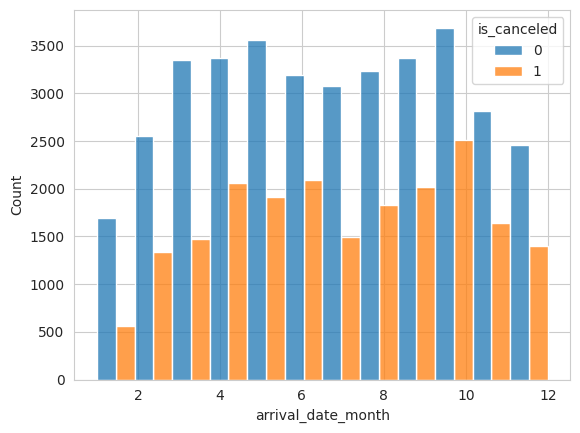

In [43]:
#mese di arrivo e cancellazioni
sns.set_style("whitegrid")
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "dodge", data=train, bins = 12)
plt.show()

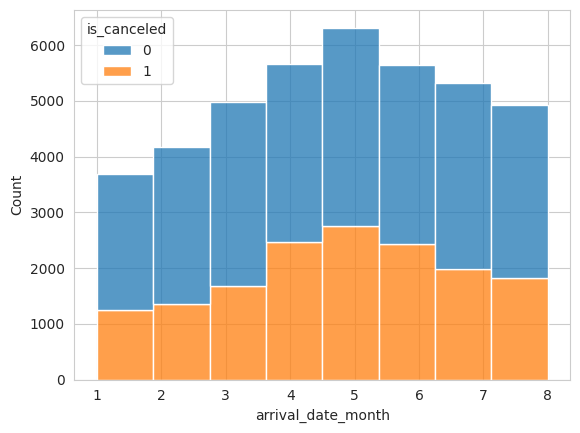

In [44]:
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "stack", stat = "count", data=test, bins =8)
plt.show()

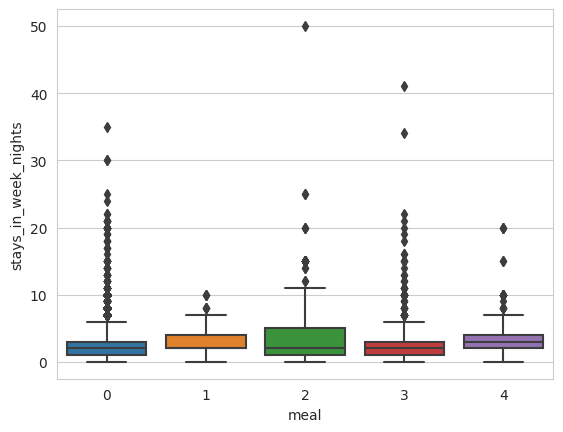

In [45]:
#tipo di pasto in base ai
sns.boxplot(x="meal", y="stays_in_week_nights", data=train)
plt.show()

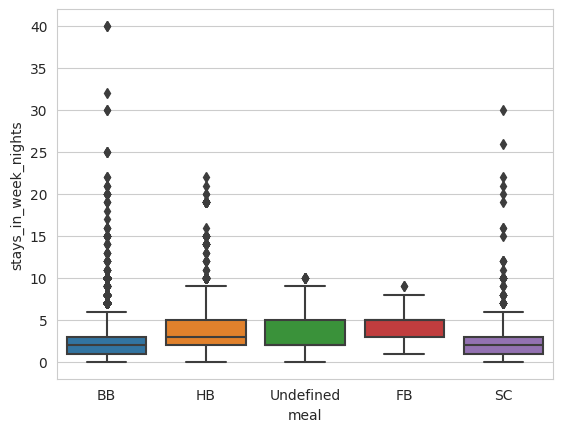

In [58]:
sns.boxplot(x="meal", y="stays_in_week_nights", data=test_non)
plt.show()

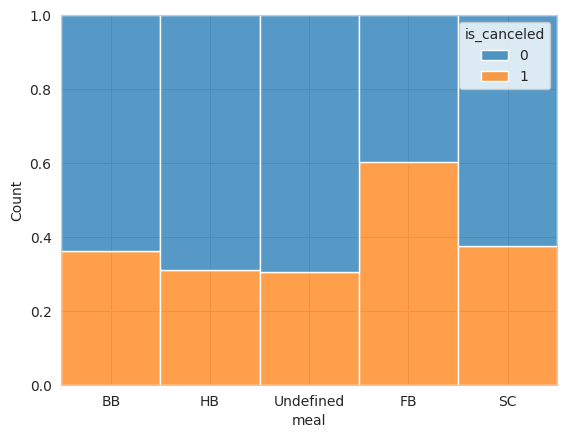

In [47]:
#tipo di pasto e cancellazioni
sns.histplot(x="meal", hue = "is_canceled", multiple = "fill", stat = "count", data=train_non, bins =8)
plt.show()

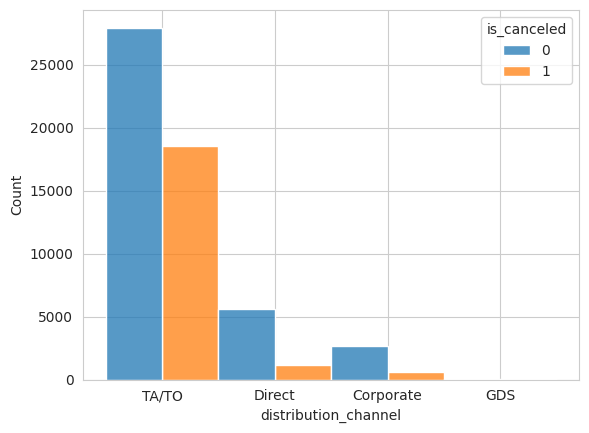

In [48]:
#canale di distribuzione e cancellazioni
sns.histplot(x="distribution_channel", hue = "is_canceled", multiple = "dodge", stat = "count", data=train_non, bins =8)
plt.show()

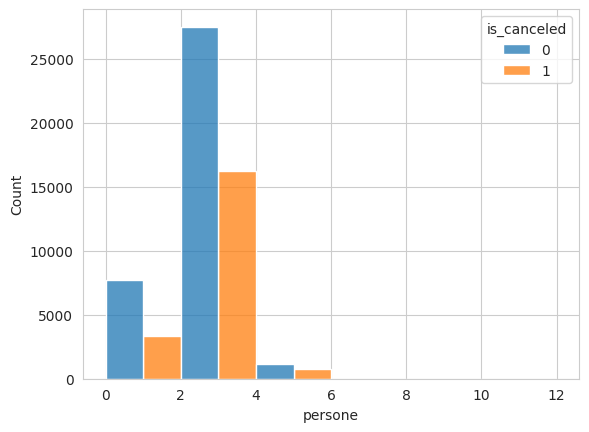

In [49]:
#persone e cancellazioni
sns.histplot(x="persone", hue = "is_canceled", multiple = "dodge", stat = "count", data=train, bins = 6)
plt.show()

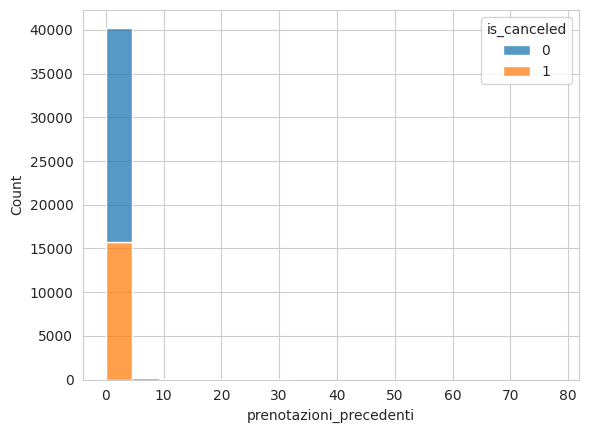

In [50]:
#prenotazioni precedenti e cancellazioni
sns.histplot(x="prenotazioni_precedenti", hue = "is_canceled", multiple = "stack", stat = "count", data=test)
plt.show()

In [ ]:
#sns.swarmplot(x="is_repeated_guest", y="stays_in_week_nights", hue="is_canceled", size=2, data=train)
#plt.show()

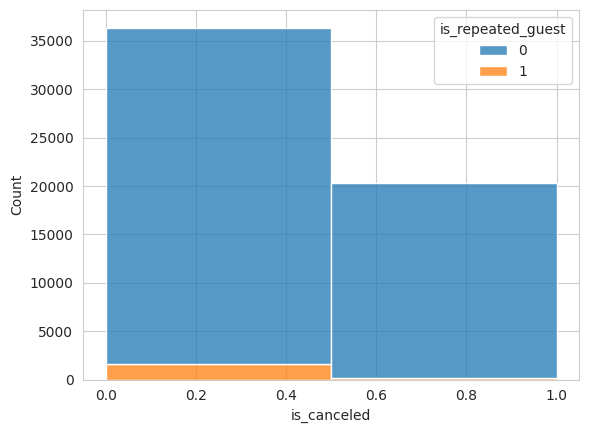

In [56]:
sns.histplot(x="is_canceled", hue = "is_repeated_guest", multiple = "stack", stat = "count", data=train, bins = 2)
plt.show()